<a href="https://colab.research.google.com/github/raisaurabh44/Titanic_Survival_Complete_Project_Pipeline_From_Scratch/blob/main/Titanic_Survival_Predition_Pipepline_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pipeline of Titanic Data Set

Pipeline chain togethe multiple steps show that the output of eache steps is used as input to the next test

Pipeline make it easy to apply the same pre processing to train and test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Titanic_Survival_Prediction_Pipeline_Scratch/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# import seaborn as sns
# df.corr()
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True,cmap='plasma')
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Test train split

In [ ]:
#X=df.drop(columns=['Survived'])
#y=df['Survived']
# Step 1 -> train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),
                                                     df['Survived'],test_size=0.2,random_state=42)


In [ ]:
X_test.shape

(179, 7)

In [ ]:
y_train.shape

(712,)

In [ ]:
#imputation transormation
trf1 = ColumnTransformer([
    ('impute_age', SimpleImputer(strategy='mean'), [2]),
    ('impute_embarked', SimpleImputer(strategy='most_frequent'),[6])
    ], remainder='passthrough')


In [ ]:
#One hot encoding
trf2= ColumnTransformer([
    ('sex_embarked', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
], remainder='passthrough')

In [ ]:
#scaling
trf3= ColumnTransformer([
    ('scale', MinMaxScaler(),slice(0,10))
])

In [ ]:
#Feature Selection
trf4= SelectKBest(score_func=chi2, k=5)

In [ ]:
#train The model
trf5= DecisionTreeClassifier()

## Create Pipeline

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

# alternate way
#pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [ ]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7c3b88622290>)),
                ('trf5', DecisionTreeClassifier())])

In [ ]:
# Explore the pipe
pipe.named_steps#['trf1'].transformers_[1][1].statistics_

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=5, score_func=<function chi2 at 0x7c3b88622290>),
 'trf5': DecisionTreeClassifier()}

In [ ]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, log_loss
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for regression

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')



# Mean Squared Error (for regression problems)
# mse = mean_squared_error(y_train, y_pred)

# Mean Absolute Error (for regression problems)
# mae = mean_absolute_error(y_train, y_pred)

# R2 Score (for regression problems)
# r2 = r2_score(y_train, y_pred)


Accuracy: 0.6256983240223464
Confusion Matrix:
[[87 18]
 [49 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       105
           1       0.58      0.34      0.43        74

    accuracy                           0.63       179
   macro avg       0.61      0.58      0.57       179
weighted avg       0.62      0.63      0.60       179



ROC AUC: 0.5762824391555735


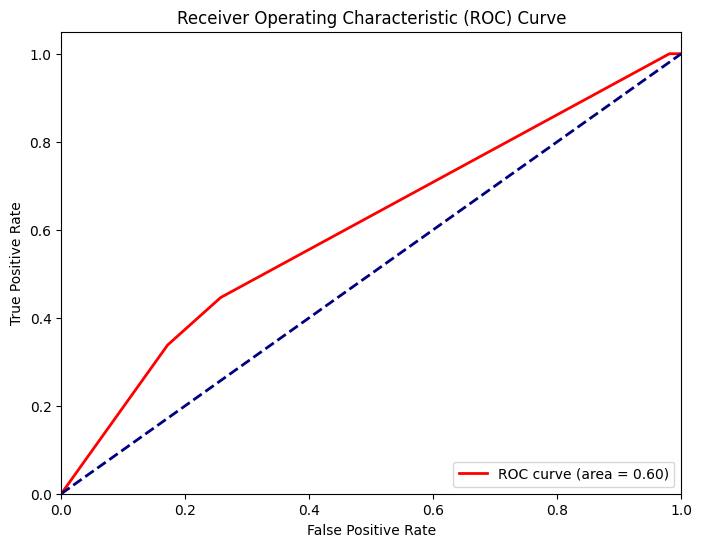

In [ ]:
# ROC Curve
y_pred_prob = pipe.predict_proba(X_train)[:, 1]  # Assuming your model has predict_proba method
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

# Assuming your model has predict_proba method
y_pred_prob = pipe.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Precision-Recall AUC: 0.5964681719559528


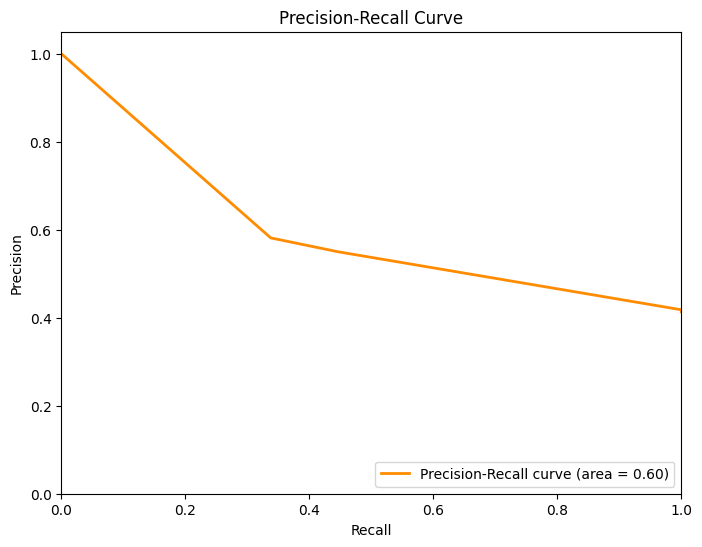

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc}')

# Assuming your model has predict_proba method
y_pred_prob = pipe.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and area under the curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'''Precision: {precision}
          Recall: {recall}
          F1-Score: {f1}''')


Precision: 0.5813953488372093
          Recall: 0.33783783783783783
          F1-Score: 0.4273504273504274


In [ ]:
# Log Loss
logloss = log_loss(y_test, y_pred_prob)
print(f'Log Loss: {logloss}')

Log Loss: 0.656081512370784


## Cross Validation using Pipeline

In [ ]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy').mean()

0.6391214419383433

### Hyper Parameters Tuning GridSearchCV

In [ ]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,6,7,8,9,10,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x7c3b88622290>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                             None]},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.6391214419383433

In [ ]:
grid.best_params_

{'trf5__max_depth': 2}

In [ ]:
# export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

### Exporting pipepline

In [ ]:
import pickle
import numpy as np
file_path = 'pipe.pkl'
pipe = pickle.load(open('pipe.pkl','rb'))
# Assume user input
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)
pipe.predict(test_input2)
#print(f'The predicted value is {test_input2}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])